<a href="https://colab.research.google.com/github/CharmStrange/CoLab_data/blob/main/ipynb-majoring/DS/%EC%A4%91%EA%B0%84%EA%B3%BC%EC%A0%95_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1차 프로젝트 - 웹 스크래핑
## `농산물 도매 시세` 데이터 추출, 인사이트 뽑고 데이터 시각화하기

- 매일 아침 가락동 농수산물 도매시장에서 경매 거래되는 주요 농산물들의 가격(시세) 정보 기록되는 웹 사이트

개발자 모드를 켜고 찾고 싶은 항목의 태그를 알아본다.
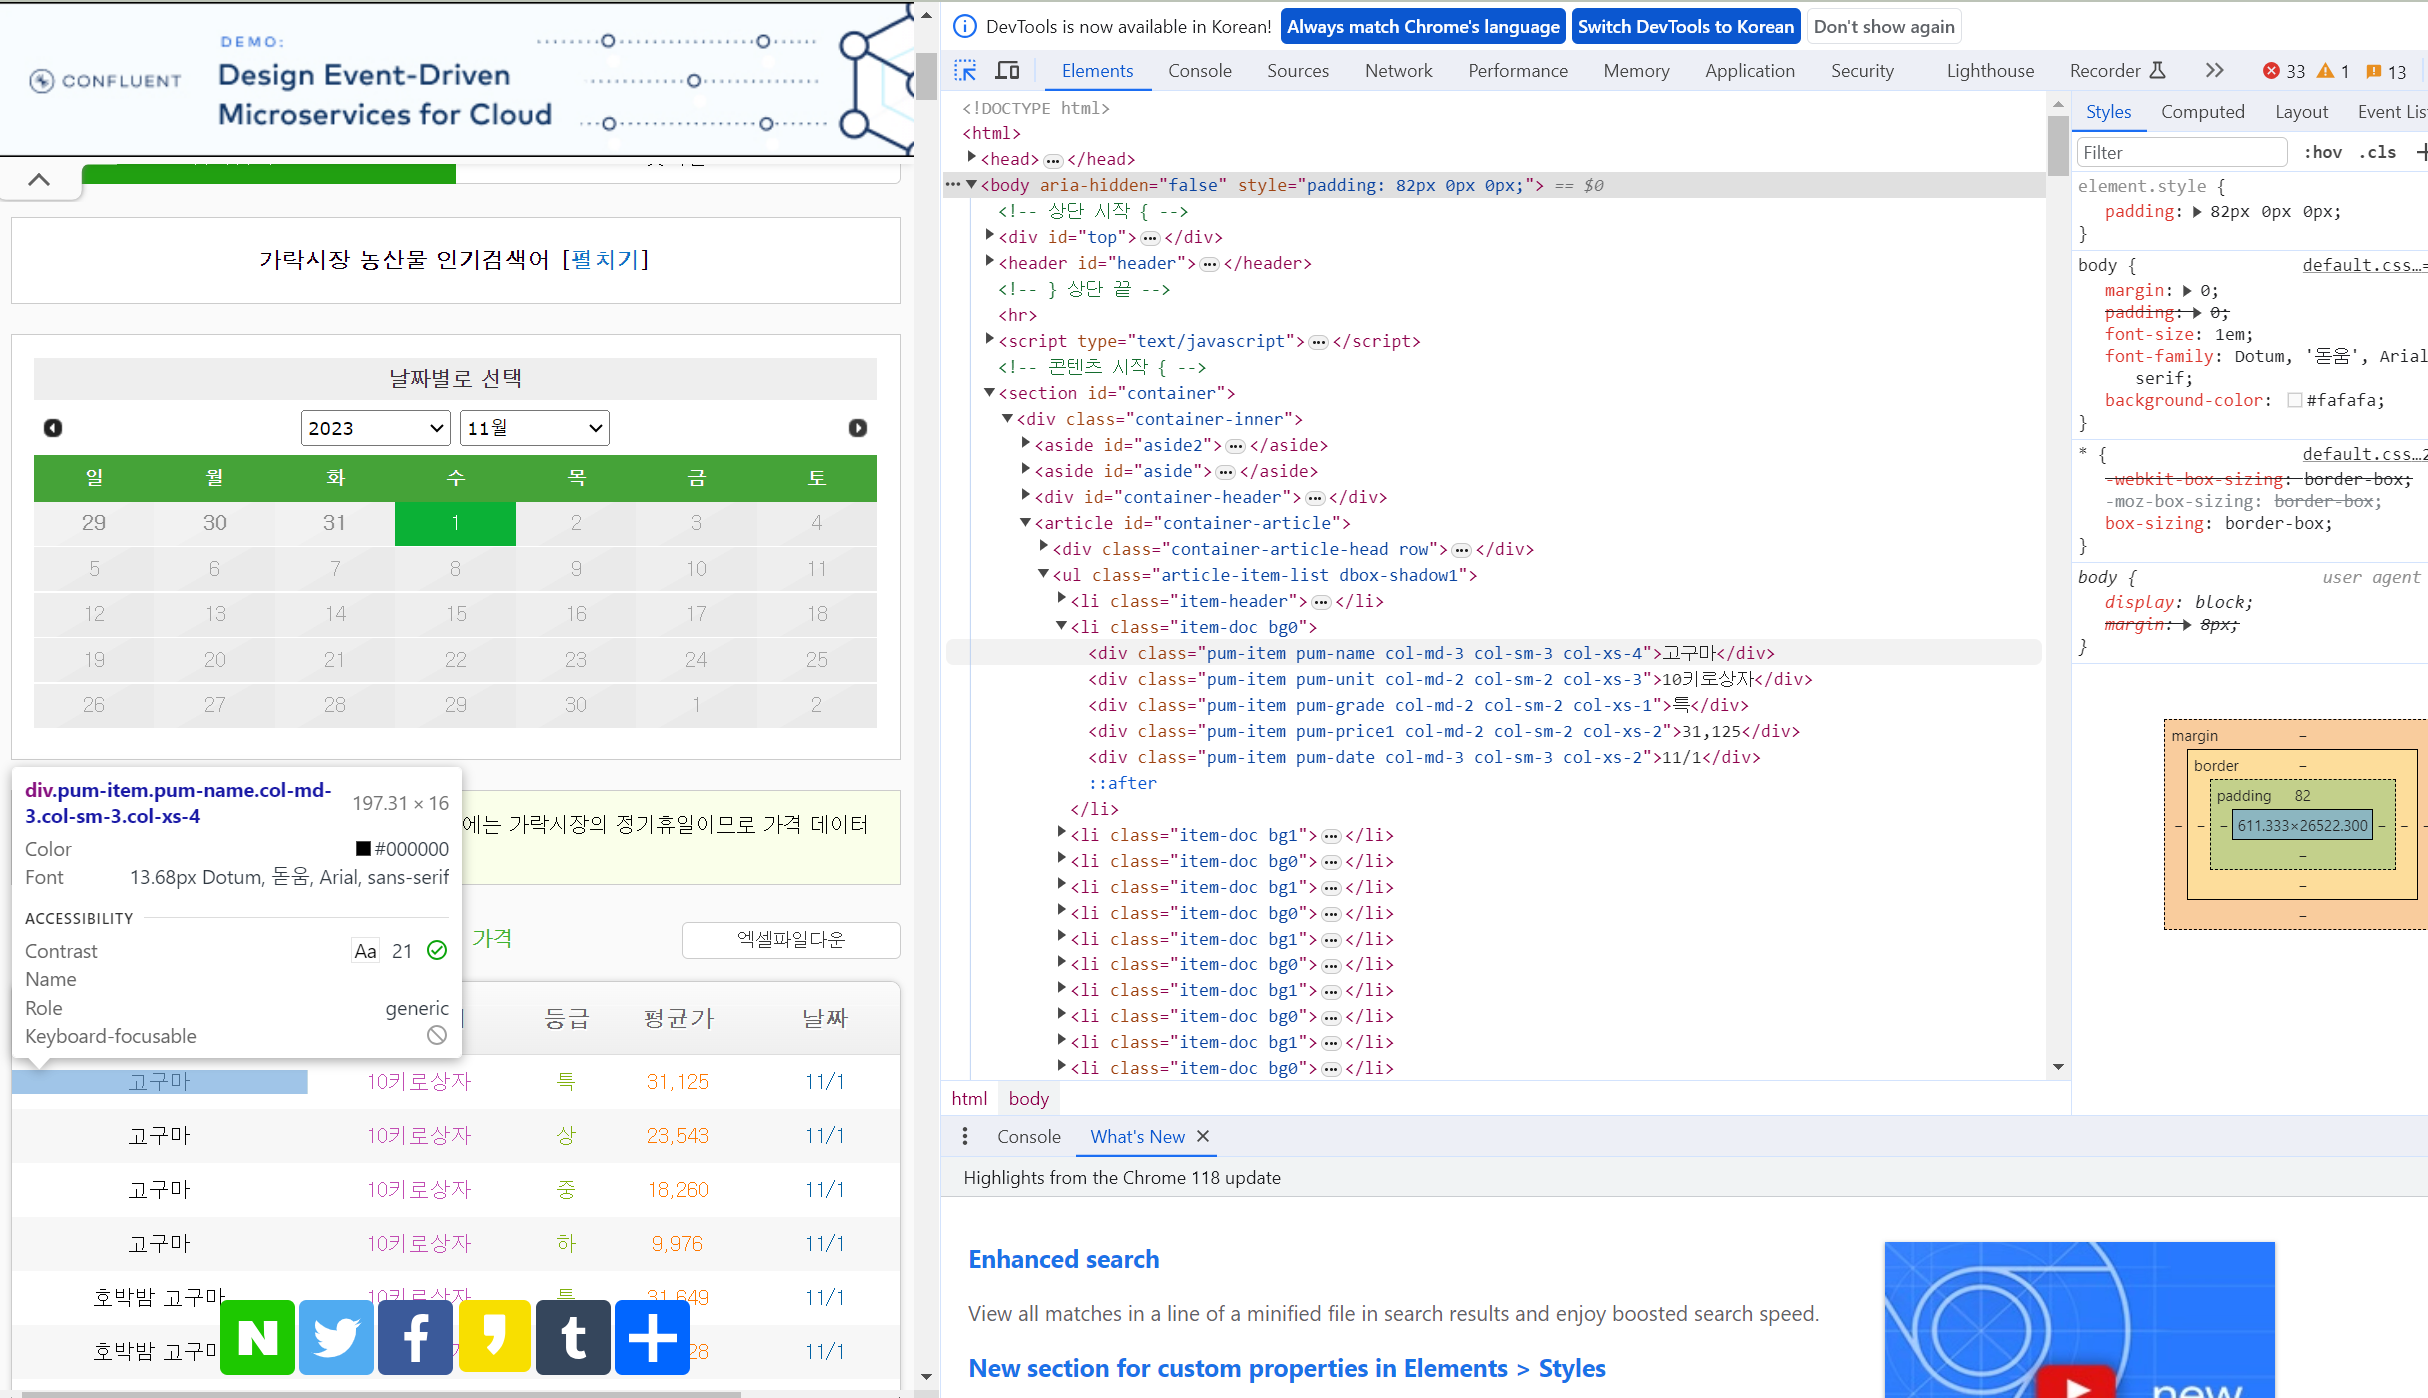

자세히 보니 `li` 태그에 `div` 태그로 묶인 데이터를 볼 수 있다. 이제 여기서 필요한 항목만 추출한다. 이 때 태그의 클래스를 사용해 항목을 추출한다. 필요한 항목의 클래스는 `pum-item pum-name col-md-3 col-sm-3 col-xs-4`, `pum-item pum-price1 col-md-2 col-sm-2 col-xs-2` 이다.

In [47]:
import requests
from bs4 import BeautifulSoup as BS
import pandas as pd

url = "https://www.garakprice.com/"
response = requests.get(url)
soup = BS(response.text, 'html.parser')
result = soup.find_all('li', ['item-doc bg0', 'item-doc bg1'])

data = []

for elements in result:
    item_data = []
    for each_element in elements.find_all('div', ['pum-item pum-name col-md-3 col-sm-3 col-xs-4', 'pum-item pum-price1 col-md-2 col-sm-2 col-xs-2']):
        item_data.append(each_element.text.strip())
    data.append(item_data)

max_columns = max(len(item) for item in data)

for item_data in data:
    while len(item_data) < max_columns:
        item_data.append(None)

df = pd.DataFrame(data)
df

,0,1
0,고구마,"31,125"
1,고구마,"23,543"
2,고구마,"18,260"
3,고구마,"9,976"
4,호박밤 고구마,"31,649"
...,...,...
693,그린키위 국산,"31,066"
694,무화과 국산,"7,757"
695,무화과 국산,"5,431"
696,무화과 국산,"3,698"
